# Capstone Project: Credit Default Risk
## Heber Jenson (Target Variable, Missing Data, Linear Models, XGBoost, Code Compilation)
## Hasitha Josyula (Correlation & KNN)
## Sai Nerusu(Dataset Aggregation, Joins, & SVM)
## Pankhuri (Outliers & RandomForest)

### Table of contents:
- Business Problem
- EDA
    - Load Data
    - Target Variable
    - Missing Values
    - Joining Datasets
    - Data Cleaning
    - Outliers
    - Correlation
    - Categorical Variables
    - EDA Summary
- Modeling
    - Sampling Methods
    - Models
    - Imbalanced performance
    - Oversample performance
    - Undersample performance
    - SMOTE performance
    - Model Selection
    - Model Summary
    
    


# Business Problem
Home Credit is a banking and lending service provider striving to offer financial services to customers with little or no credit history. Their goal is to provide loans to their clients, who will most likely repay them. Through machine learning and data analysis, they want to maximize their ability to identify customers who can pay their loan payments on time. Home Credit desires to maximize the number of loans to customers capable of repayment, as it will boost the company's financial returns. This notebook will walk through the sets used to address this business problem.
# EDA
EDA, or exploratory data analysis, is the first step in creating a solution to the Home Credits problem. We first need to explore the data that has been provided and determine what it contains, address any potential errors or missing values, and determine what variables may be the most important to determine if someone can pay back their loans.

## Load Data

In [1]:
# Package Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')

### Data
The data for this project includes a total of 8 different datasets. The application train and test sets are the primary datasets for this project. Data contained in these datasets is information that potential customers will include in their application for a loan. The train set should be used for model development. The test set should be used for final submission and model comparison based on Kaggle's results. Other datasets are linked to one another based on specific primary keys. The bureau data sets contain information about customers with previous loans reported to the credit bureaus. Credit card balance data is available for any client with a credit card loan through Home Credit. Installments and Cash balance data contain information about the client’s previous loans with Home Credit.

Due to the size of the datasets we will not be able to explore all the variables or data sets.

In [2]:
# Import test and trian data
app_test = pd.read_csv(r'home-credit-default-risk/application_test.csv')
app_train = pd.read_csv(r'home-credit-default-risk/application_train.csv')
bureau = pd.read_csv(r'home-credit-default-risk/bureau.csv')
# bureau_bal = pd.read_csv(r'home-credit-default-risk/bureau_balance.csv')
# cc_bal = pd.read_csv(r'home-credit-default-risk/credit_card_balance.csv')
# inst_pymt = pd.read_csv(r'home-credit-default-risk/installments_payments.csv')
# pos_bal = pd.read_csv(r'home-credit-default-risk/POS_CASH_balance.csv')
prv_app = pd.read_csv(r'home-credit-default-risk/previous_application.csv')
smpl_sub = pd.read_csv(r'home-credit-default-risk/sample_submission.csv')

In [3]:
print(app_test.shape)
app_train.shape

(48744, 121)


(307511, 122)

## Target Variable
### Target Variable Questions: 
What is the target variable?, Is it categorical or numeric?, If categorical, what is the balance within the dataset?

In [4]:
# Show training data target response totals
app_train['TARGET'].value_counts() # Only 8% of the training data has a target value of 1

0    282686
1     24825
Name: TARGET, dtype: int64

In [5]:
MajorityClass_sub = smpl_sub.copy()
MajorityClass_sub.iloc[:,1] = 1

print(MajorityClass_sub.head())
MajorityClass_sub.to_csv("Majority_sub.csv", index = False, header = True)

   SK_ID_CURR  TARGET
0      100001       1
1      100005       1
2      100013       1
3      100028       1
4      100038       1


### Target Value Results

The target variable for this project is categorical in nature. This means the target variable will only take a select set of values. In this case, the target variable is binary, where 1 indicates a high risk of default, and 0 indicates a low risk of default. The target variable is also imbalanced, with only 8% of the observations defaulting on their loans.  It is to be expected as financial institutions would not stay in business if a large portion of their customers were not repaying their loans. When training the model, we may want to include Oversampling techniques to improve model performance. When we created a model that used the majority class as our predictor for the baseline, we obtained an accuracy score from Kaggle of 0.5. Future model performance can be compared with this value.

## Missing Values
### Missing Values Questions:
How many of the variables in the datasets have missing values?, At what point should we drop a variable if it is missing too many values?, What should we do with missing data rows?

In [6]:
def percentage_na_values_table(df):
    # Sum of NA values in df
    na_val = df.isna().sum()
    
    # Percentage of NA values
    na_val_perc = 100 * na_val / len(df)
    
    # Create Table
    na_col_table = pd.concat([na_val, na_val_perc], axis = 1)
    
    # Sort by %NA descending
    na_col_table = na_col_table[
        na_col_table.iloc[:,1] != 0].sort_values(1, ascending = False).round(1) 
    
    # Add column names
    na_col_table = na_col_table.rename(columns = {0: 'Total NA\'s in Column', 1: "Percentage NA"})
    
    print("DF has " + str(df.shape[1]) + " columns.\nThere are " + str(na_col_table.shape[0]) + " columns that have missing values.")
    
    # Return Table
    return na_col_table
    

In [7]:
percentage_na_values_table(app_train).tail(30)

DF has 122 columns.
There are 67 columns that have missing values.


,Total NA's in Column,Percentage NA
LIVINGAREA_MEDI,154350,50.2
LIVINGAREA_MODE,154350,50.2
LIVINGAREA_AVG,154350,50.2
HOUSETYPE_MODE,154297,50.2
FLOORSMAX_MEDI,153020,49.8
FLOORSMAX_AVG,153020,49.8
FLOORSMAX_MODE,153020,49.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
YEARS_BEGINEXPLUATATION_MEDI,150007,48.8
YEARS_BEGINEXPLUATATION_MODE,150007,48.8


Wow, over half of the variables in the data have over 50% Null values. This is a major issue, lets see what the other datasets look like.

In [8]:
percentage_na_values_table(app_test).tail(25)

DF has 121 columns.
There are 64 columns that have missing values.


,Total NA's in Column,Percentage NA
LIVINGAREA_MODE,23552,48.3
FLOORSMAX_MEDI,23321,47.8
FLOORSMAX_MODE,23321,47.8
FLOORSMAX_AVG,23321,47.8
YEARS_BEGINEXPLUATATION_MEDI,22856,46.9
YEARS_BEGINEXPLUATATION_MODE,22856,46.9
YEARS_BEGINEXPLUATATION_AVG,22856,46.9
TOTALAREA_MODE,22624,46.4
EMERGENCYSTATE_MODE,22209,45.6
EXT_SOURCE_1,20532,42.1


In [9]:
percentage_na_values_table(bureau).tail(10)

DF has 17 columns.
There are 7 columns that have missing values.


,Total NA's in Column,Percentage NA
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


In [10]:
percentage_na_values_table(prv_app).tail(20)

DF has 37 columns.
There are 16 columns that have missing values.


,Total NA's in Column,Percentage NA
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


### Missing values
There are a lot of missing values in many of the columns in the application datasets. We need to try and determine what variables are worth keeping and what is not. We can now look at missing data in the other datasets. This could be useful to determine what datasets to add to the application data.

The previous application dataset has a lot of missing values. Both Rate_Interest_Primary and Rate_Interest_Privileged are missing almost all the data. Why would Health Equity track these variables if all the data is missing?

In [11]:
# percentage_na_values_table(bureau_bal).tail()

In [12]:
# percentage_na_values_table(cc_bal).tail(10)

In [13]:
# percentage_na_values_table(inst_pymt).tail()

In [14]:
# percentage_na_values_table(pos_bal).tail()

## Joining Datasets
For furthure analysis it would be smart to join the datasets together to get a better picture of the data. The different data sets have different levels of granularity. We will need to address that when we get to the datasets we want to combined.

In [15]:
app_test.shape

(48744, 121)

In [16]:
# With combining tables, we first want to combine the application data. This allows us to maintain the same number of columns when we seperate them later.
data_j = app_test.append(app_train, ignore_index = True, verify_integrity = True)
data_j.shape

(356255, 122)

### Bureau Dataset
We wanted to first look into the bureau dataset as it is directly related to the application datasets base on the SK_ID_CURR varaible.

In [17]:
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


It looks like the bureau data has multiple rows for individual applicants. This would be a problem to try and join the bureau data to the application data. Instead we can create a smaller table with variables that match the granularity of the application data.

In [18]:
num_loans = bureau.groupby('SK_ID_CURR', as_index = False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'NUM_PREV_LOANS'})
num_loans.head()

,SK_ID_CURR,NUM_PREV_LOANS
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [19]:
bureau['NUM_ACTIVE_ACNT'] = np.where(bureau['CREDIT_ACTIVE'] == 'Closed', 0, 1)
num_actv_lns = bureau.groupby('SK_ID_CURR', as_index = False)['NUM_ACTIVE_ACNT'].sum()
num_actv_lns.head()

,SK_ID_CURR,NUM_ACTIVE_ACNT
0,100001,3
1,100002,2
2,100003,1
3,100004,0
4,100005,2


In [20]:
AMT_CREDIT_T = bureau.groupby('SK_ID_CURR', as_index = False)['AMT_CREDIT_SUM'].sum().round(2).rename(columns = {'AMT_CREDIT_SUM': 'TOTAL_CREDIT_AMT_PREV'})
AMT_CREDIT_T.head()

,SK_ID_CURR,TOTAL_CREDIT_AMT_PREV
0,100001,1453365.00
1,100002,865055.56
2,100003,1017400.50
3,100004,189037.80
4,100005,657126.00


In [21]:
# This function will change the numeric variables granularity to match the granularity of the application data. 
# We need to be sure that the columns this is used on are continuous and not categorical.

def agg_numeric_categorical(df, group_var, df_name):
    for xcol in df:
        if xcol != group_var and 'SK_ID' in xcol:
            df = df.drop(columns=xcol)            
    grp_id = df[group_var]
    numeric_df = df.select_dtypes(include='number')
#     categorical_df = df.select_dtypes(include='object')
#     categorical_df[group_var] = grp_id
    numeric_agg = numeric_df.groupby(group_var).agg(['count', 'sum']).reset_index() # Grouping and performing aggregations could use ['count', 'sum', 'max', 'min', 'mean']
#     categorical_agg = categorical_df.groupby(group_var).agg(lambda x: x.value_counts().index[0]).reset_index()
    numeric_agg.columns = [group_var] + [f'{df_name}_{col[0]}_{col[1]}' for col in numeric_agg.columns[1:]]
#     categorical_agg.columns = [group_var] + [f'{df_name}_{col[0]}' for col in categorical_agg.columns[1:]]
#     agg = numeric_agg.merge(categorical_agg, on=group_var, how='left')
    return numeric_agg

In [22]:
bureau_agg = agg_numeric_categorical(bureau, 'SK_ID_CURR', 'data_bureau')

bureau_agg.head()

,SK_ID_CURR,data_bureau_DAYS_CREDIT_count,data_bureau_DAYS_CREDIT_sum,data_bureau_CREDIT_DAY_OVERDUE_count,data_bureau_CREDIT_DAY_OVERDUE_sum,data_bureau_DAYS_CREDIT_ENDDATE_count,data_bureau_DAYS_CREDIT_ENDDATE_sum,data_bureau_DAYS_ENDDATE_FACT_count,data_bureau_DAYS_ENDDATE_FACT_sum,data_bureau_AMT_CREDIT_MAX_OVERDUE_count,...,data_bureau_AMT_CREDIT_SUM_LIMIT_count,data_bureau_AMT_CREDIT_SUM_LIMIT_sum,data_bureau_AMT_CREDIT_SUM_OVERDUE_count,data_bureau_AMT_CREDIT_SUM_OVERDUE_sum,data_bureau_DAYS_CREDIT_UPDATE_count,data_bureau_DAYS_CREDIT_UPDATE_sum,data_bureau_AMT_ANNUITY_count,data_bureau_AMT_ANNUITY_sum,data_bureau_NUM_ACTIVE_ACNT_count,data_bureau_NUM_ACTIVE_ACNT_sum
0,100001,7,-5145,7,0,7,577.0,4,-3302.0,0,...,6,0.000,7,0.0,7,-652,7,24817.5,7,3
1,100002,8,-6992,8,0,6,-2094.0,6,-4185.0,5,...,4,31988.565,8,0.0,8,-3999,7,0.0,8,2
2,100003,4,-5603,4,0,4,-2178.0,3,-3292.0,4,...,4,810000.000,4,0.0,4,-3264,0,0.0,4,1
3,100004,2,-1734,2,0,2,-977.0,2,-1065.0,1,...,2,0.000,2,0.0,2,-1064,0,0.0,2,0
4,100005,3,-572,3,0,3,1318.0,1,-123.0,1,...,3,0.000,3,0.0,3,-163,3,4261.5,3,2


### Previous Application Dataset
Lets quickly view the application dataset.

In [23]:
print(prv_app.shape)

print(prv_app['SK_ID_CURR'].nunique())
prv_app.head()

(1670214, 37)
338857


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
num_prev_apps = prv_app.groupby('SK_ID_CURR', as_index = False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'NUM_PREV_APPS'})
num_prev_apps.head()

,SK_ID_CURR,NUM_PREV_APPS
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [25]:
prv_app.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [26]:
prv_app_numeric = prv_app.select_dtypes(exclude = 'object')

prv_app_num = prv_app_numeric.copy()
for i in prv_app_numeric.columns:
    if prv_app_numeric[i].nunique(1) == 2:
        prv_app_num.drop(i, inplace = True, axis = 1)
prv_app_num.head()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,15,0.0,0.182832,0.867336,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,11,NaN,NaN,NaN,-164,-1,36.0,365243.0,-134.0,916.0,365243.0,365243.0
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,11,NaN,NaN,NaN,-301,-1,12.0,365243.0,-271.0,59.0,365243.0,365243.0
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,7,NaN,NaN,NaN,-512,-1,12.0,365243.0,-482.0,-152.0,-182.0,-177.0
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,9,NaN,NaN,NaN,-781,-1,24.0,NaN,NaN,NaN,NaN,NaN


In [27]:
prv_app_agg = agg_numeric_categorical(prv_app_num, 'SK_ID_CURR', 'prv_app')
prv_app_agg

,SK_ID_CURR,prv_app_AMT_ANNUITY_count,prv_app_AMT_ANNUITY_sum,prv_app_AMT_APPLICATION_count,prv_app_AMT_APPLICATION_sum,prv_app_AMT_CREDIT_count,prv_app_AMT_CREDIT_sum,prv_app_AMT_DOWN_PAYMENT_count,prv_app_AMT_DOWN_PAYMENT_sum,prv_app_AMT_GOODS_PRICE_count,...,prv_app_DAYS_FIRST_DRAWING_count,prv_app_DAYS_FIRST_DRAWING_sum,prv_app_DAYS_FIRST_DUE_count,prv_app_DAYS_FIRST_DUE_sum,prv_app_DAYS_LAST_DUE_1ST_VERSION_count,prv_app_DAYS_LAST_DUE_1ST_VERSION_sum,prv_app_DAYS_LAST_DUE_count,prv_app_DAYS_LAST_DUE_sum,prv_app_DAYS_TERMINATION_count,prv_app_DAYS_TERMINATION_sum
0,100001,1,3951.000,1,24835.5,1,23787.0,1,2520.0,1,...,1,365243.0,1,-1709.0,1,-1499.0,1,-1619.0,1,-1612.0
1,100002,1,9251.775,1,179055.0,1,179055.0,1,0.0,1,...,1,365243.0,1,-565.0,1,125.0,1,-25.0,1,-17.0
2,100003,3,169661.970,3,1306309.5,3,1452573.0,2,6885.0,3,...,3,1095729.0,3,-3823.0,3,-3013.0,3,-3163.0,3,-3142.0
3,100004,1,5357.250,1,24282.0,1,20106.0,1,4860.0,1,...,1,365243.0,1,-784.0,1,-694.0,1,-724.0,1,-714.0
4,100005,1,4813.200,2,44617.5,2,40153.5,1,4464.0,1,...,1,365243.0,1,-706.0,1,-376.0,1,-466.0,1,-460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,1,6605.910,1,40455.0,1,40455.0,1,0.0,1,...,1,365243.0,1,-210.0,1,0.0,1,-30.0,1,-25.0
338853,456252,1,10074.465,1,57595.5,1,56821.5,1,3456.0,1,...,1,365243.0,1,-2466.0,1,-2316.0,1,-2316.0,1,-2311.0
338854,456253,2,9540.810,2,48325.5,2,41251.5,2,8806.5,2,...,2,730486.0,2,-4678.0,2,-4438.0,2,-4438.0,2,-4425.0
338855,456254,2,21362.265,2,242635.5,2,268879.5,2,0.0,2,...,2,730486.0,2,-538.0,2,302.0,2,730486.0,2,730486.0


### Joining New variables to Application dataset
Lets now add these new variables to the application dataset. Due to computational processing power, we are going to exclude the datasets bureau_agg and prv_app_agg.

In [28]:
data_j = data_j.merge(num_loans, on = 'SK_ID_CURR', how = 'left')
data_j = data_j.merge(num_actv_lns, on = 'SK_ID_CURR', how = 'left')
data_j = data_j.merge(AMT_CREDIT_T, on = 'SK_ID_CURR', how = 'left')
data_j = data_j.merge(num_prev_apps, on = 'SK_ID_CURR', how = 'left')
# data_j = data_j.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
# data_j = data_j.merge(prv_app_agg, on = 'SK_ID_CURR', how = 'left')

data_j.shape

(356255, 126)

In [29]:
data_j['NUM_PREV_LOANS'] = data_j['NUM_PREV_LOANS'].fillna(0)
data_j['NUM_ACTIVE_ACNT'] = data_j['NUM_ACTIVE_ACNT'].fillna(0)
data_j['TOTAL_CREDIT_AMT_PREV'] = data_j['TOTAL_CREDIT_AMT_PREV'].fillna(0)
data_j['NUM_PREV_APPS'] = data_j['NUM_PREV_APPS'].fillna(0)

# for i in bureau_agg.columns:
#     data_j[i] = data_j[i].fillna(0)
# for i in prv_app_agg.columns:
#     data_j[i] = data_j[i].fillna(0)


## Data Cleaning
### Data Cleaning Questions:
How should we deal with null values?, How many null values are still in the dataset

In [30]:
percentage_na_values_table(data_j).tail(30)

DF has 126 columns.
There are 68 columns that have missing values.


,Total NA's in Column,Percentage NA
LIVINGAREA_MEDI,177902,49.9
LIVINGAREA_MODE,177902,49.9
LIVINGAREA_AVG,177902,49.9
FLOORSMAX_MODE,176341,49.5
FLOORSMAX_AVG,176341,49.5
FLOORSMAX_MEDI,176341,49.5
YEARS_BEGINEXPLUATATION_MEDI,172863,48.5
YEARS_BEGINEXPLUATATION_AVG,172863,48.5
YEARS_BEGINEXPLUATATION_MODE,172863,48.5
TOTALAREA_MODE,171055,48.0


In [31]:
# We still have a large number of variables with high percentages of null values.
data_target = data_j[['SK_ID_CURR', 'TARGET']]
data = data_j.dropna(thresh = len(data_j['SK_ID_CURR']) / 100000000, axis = 1)
print(data.shape)

# lets impute values using the median value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'median')

data[data.select_dtypes(exclude = 'object').columns] = imp.fit_transform(data[data.select_dtypes(exclude = 'object').columns])
print(data.shape)

(356255, 126)
(356255, 126)


In [32]:
# Adding Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly_features = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
p_trans = PolynomialFeatures(degree = 3)
p_trans.fit(poly_features)
poly_features = p_trans.transform(poly_features)
poly_features = pd.DataFrame(poly_features,
                            columns = p_trans.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features = poly_features.drop('1', axis = 1)
poly_features['SK_ID_CURR'] = data['SK_ID_CURR']
print(poly_features.shape)
poly_features.head()


(356255, 35)


,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,EXT_SOURCE_2 EXT_SOURCE_3,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,SK_ID_CURR
0,0.752614,0.789654,0.159520,-19241.0,0.566429,0.594305,0.120057,-14481.055414,0.623554,0.125965,...,0.099469,-11997.802403,0.020094,-2423.698322,2.923427e+08,0.004059,-489.615795,5.905670e+07,-7.123328e+12,100001.0
1,0.564990,0.291656,0.432962,-18064.0,0.319214,0.164783,0.244619,-10205.983005,0.085063,0.126276,...,0.036829,-1536.577117,0.054673,-2281.043619,9.516956e+07,0.081161,-3386.201665,1.412789e+08,-5.894429e+12,100005.0
2,0.506155,0.699787,0.610991,-20038.0,0.256193,0.354200,0.309256,-10142.330056,0.489702,0.427564,...,0.299203,-9812.640816,0.261238,-8567.521115,2.809794e+08,0.228089,-7480.393855,2.453261e+08,-8.045687e+12,100013.0
3,0.525734,0.509677,0.612704,-13976.0,0.276396,0.267955,0.322119,-7347.658072,0.259771,0.312281,...,0.159163,-3630.555667,0.191336,-4364.443591,9.955450e+07,0.230013,-5246.681115,1.196786e+08,-2.729912e+12,100028.0
4,0.202145,0.425687,0.533482,-13040.0,0.040863,0.086051,0.107841,-2635.970697,0.181210,0.227096,...,0.096672,-2362.974127,0.121152,-2961.336424,7.238455e+07,0.151830,-3711.218550,9.071407e+07,-2.217342e+12,100038.0


In [33]:
data = data.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

In [34]:
print(data.shape)
data.dtypes.value_counts()
# We have at least 14 categorical vairbles contained within the data. We need to address this issue.

(356255, 160)


float64    144
object      16
dtype: int64

## Data Distrubution & Outliers

### Remove categorical variables with extremely imbalanced responses.
(Threshold 8%)

In [35]:
data_numeric = data.select_dtypes(exclude = 'object')

data_num = data_numeric.copy() # DF for numeric variables
print(data_num.shape)
data_bin = [] # Stores column names for binary variables
for i in data_numeric.columns:
    if data_numeric[i].nunique(1) == 2:
        data_bin.append(i)
        data_num.drop(i, inplace = True, axis = 1)
data_num.shape

(356255, 144)


(356255, 111)

In [36]:
import re    
#docs = data[data.columns]
# for i in data.columns:
#     if re.search("FLAG_.", i):
#         docs.append(i)

for i in data_bin:
    if data[i].value_counts(dropna = True, normalize = True)[0] < 0.08 or data[i].value_counts(dropna = True, normalize = True)[1] < 0.08:
        data.drop(i, inplace = True, axis = 1)

data = data.merge(data_target, on = 'SK_ID_CURR', how = 'left')
data.shape

(356255, 136)

In [37]:
# We can look at the discriptive stats for all of the columns.
data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH_x,DAYS_EMPLOYED,DAYS_REGISTRATION,...,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
count,356255.000000,356255.000000,3.562550e+05,3.562550e+05,356255.000000,3.562550e+05,356255.000000,356255.000000,356255.000000,356255.000000,...,3.562550e+05,3.562550e+05,3.562550e+05,356255.000000,3.562550e+05,3.562550e+05,356255.000000,3.562550e+05,3.562550e+05,307511.000000
mean,278128.000000,0.414316,1.701161e+05,5.877674e+05,27425.323483,5.279591e+05,0.020917,-16041.248841,64317.231413,-4983.593527,...,1.576149e-01,-4.905682e+03,1.547004e-01,-4400.854036,1.444833e+08,1.799817e-01,-4859.569936,1.462892e+08,-5.051669e+12,0.080729
std,102842.104413,0.720378,2.235068e+05,3.986237e+05,14732.082676,3.659286e+05,0.013915,4358.803980,141705.532576,3526.968986,...,1.099333e-01,3.225480e+03,1.113543e-01,2770.805347,9.609354e+07,1.404226e-01,3302.460813,9.808679e+07,3.743100e+12,0.272419
min,100001.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000253,-25229.000000,-17912.000000,-24672.000000,...,3.564084e-15,-1.740423e+04,2.762426e-12,-16843.835329,9.716420e+00,1.465843e-10,-19032.780832,3.131029e+04,-1.605832e+13,0.000000
25%,189064.500000,0.000000,1.125000e+05,2.700000e+05,16731.000000,2.340000e+05,0.010006,-19676.000000,-2781.000000,-7477.000000,...,6.213037e-02,-7.147377e+03,6.416081e-02,-6190.423992,6.842849e+07,7.075080e-02,-6639.887462,6.797325e+07,-7.617465e+12,0.000000
50%,278128.000000,0.000000,1.530000e+05,5.002110e+05,25078.500000,4.500000e+05,0.018850,-15755.000000,-1224.000000,-4502.000000,...,1.476441e-01,-4.681112e+03,1.414617e-01,-4026.802204,1.239600e+08,1.518303e-01,-4345.028650,1.235807e+08,-3.910706e+12,0.000000
75%,367191.500000,1.000000,2.025000e+05,7.975575e+05,34960.500000,6.750000e+05,0.028663,-12425.000000,-290.000000,-1995.000000,...,2.371950e-01,-2.238321e+03,2.148207e-01,-2227.130880,2.054197e+08,2.556918e-01,-2425.952985,2.069655e+08,-1.918179e+12,0.000000
max,456255.000000,20.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7338.000000,365243.000000,0.000000,...,5.941932e-01,-7.284077e-11,6.219768e-01,-0.000075,5.097653e+08,7.193461e-01,-0.002142,5.392817e+08,-3.951237e+11,1.000000


In [38]:
# Dataset is still very large for computations. It will take a long time to train models.
data.shape

(356255, 136)

In [39]:
percentage_na_values_table(data).tail(30)

DF has 136 columns.
There are 7 columns that have missing values.


,Total NA's in Column,Percentage NA
FONDKAPREMONT_MODE,243092,68.2
WALLSMATERIAL_MODE,180234,50.6
HOUSETYPE_MODE,177916,49.9
EMERGENCYSTATE_MODE,167964,47.1
OCCUPATION_TYPE,111996,31.4
TARGET,48744,13.7
NAME_TYPE_SUITE,2203,0.6


## Categorical Variables
### Categorical Questions:
How many categorical variables are there?, How should we encode the categorical variables?, How many columns will be in the dataset after we encode all the categorical variables?

In [40]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [41]:
# Lets perform one-hot encoding on the categorical variables. This will be usefule for performing logistical regression on the data.
target = data['TARGET'].copy()
data = pd.get_dummies(data)
data.shape

(356255, 260)

In [42]:
data[data.select_dtypes(exclude = 'object').columns] = imp.fit_transform(data[data.select_dtypes(exclude = 'object').columns])
data['TARGET'] = target
percentage_na_values_table(data).tail(30)

DF has 260 columns.
There are 1 columns that have missing values.


,Total NA's in Column,Percentage NA
TARGET,48744,13.7


## Outliers
### Outlier Questions:
How should we address any found outliers?, How many variables have outliers?

### Example 1: Days Employed

In [43]:
# DAYS EMPLOYED
data['DAYS_EMPLOYED'].describe()

count    356255.000000
mean      64317.231413
std      141705.532576
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

The max value of days_employed is more than 1000 years. This is definately an error in the data.

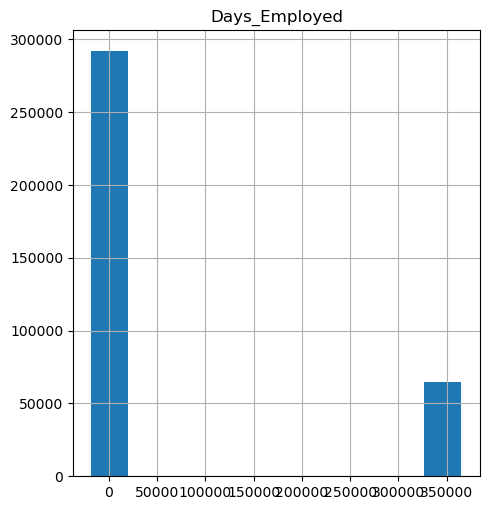

In [44]:
data['DAYS_EMPLOYED'].hist(figsize=(5, 5))
plt.tight_layout()
plt.title('Days_Employed')
plt.show()

You can see the outliers in the visual plot. It looks like we have a few observations with large values.

In [45]:
# Split data set up again.
data_1 = data.copy()
data = data.loc[data['TARGET'].notna()].copy()
data_test = data_1.loc[data_1['TARGET'].isna()] 
print(data.shape)
data_test.shape

(307511, 260)


(48744, 260)

In [46]:
from scipy import stats

# Due to the size of the dataframe it would be impracticle to show a histogram for each of the varaibles and try to visually determine what variables that have outliers. 
# Instead we will use the Z-score function in the scipy package. The function will calculate a zscore for each value in the df. We will remove any zscores > 3 
data_numeric = data.select_dtypes(exclude = 'object')

data_num = data_numeric.copy() # DF for numeric variables
print(data_num.shape)
data_bin = [] # Stores column names for binary variables
for i in data_numeric.columns:
    if data_numeric[i].nunique(1) == 2:
        data_bin.append(i)
        data_num.drop(i, inplace = True, axis = 1)
print(data_num.shape)



(307511, 260)
(307511, 111)


In [47]:
data_num

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH_x,DAYS_EMPLOYED,DAYS_REGISTRATION,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3
48744,100002.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,...,0.018181,0.009637,-654.152107,0.005108,-346.733022,2.353667e+07,0.002707,-183.785678,1.247560e+07,-8.468590e+11
48745,100003.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,...,0.240927,0.206559,-6491.237078,0.177093,-5565.253915,1.748916e+08,0.151830,-4771.363419,1.499431e+08,-4.712058e+12
48746,100004.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,...,0.171798,0.225464,-5885.942404,0.295894,-7724.580288,2.016572e+08,0.388325,-10137.567875,2.646504e+08,-6.908939e+12
48747,100006.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,...,0.275185,0.225702,-8040.528832,0.185117,-6594.710164,2.349331e+08,0.151830,-5408.873354,1.926882e+08,-6.864416e+12
48748,100007.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,...,0.033616,0.055567,-2076.117157,0.091852,-3431.791051,1.282190e+08,0.151830,-5672.700010,2.119440e+08,-7.918677e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456251.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,-8456.0,...,0.316702,0.247868,-4333.535804,0.193994,-3391.654868,5.929720e+07,0.151830,-2654.488912,4.640913e+07,-8.113830e+11
356251,456252.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,-4388.0,...,0.001561,0.007178,-279.510194,0.033012,-1285.549522,5.006225e+07,0.151830,-5912.620044,2.302510e+08,-8.966503e+12
356252,456253.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,-6737.0,...,0.153751,0.062812,-4295.209004,0.025661,-1754.727146,1.199916e+08,0.010483,-716.860892,4.902031e+07,-3.352102e+12
356253,456254.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,-2562.0,...,0.135926,0.174750,-3162.050698,0.224665,-4065.229651,7.355897e+07,0.288836,-5226.384299,9.456968e+07,-1.711207e+12


In [48]:
test = data[(np.abs(stats.zscore(data[data_num.columns])) < 3).all(axis = 1)]
test.shape
# we have removed rows with numeric outliers above a zscore of 3. There were a significant number of rows with outliers, aproximately 100K.

(206967, 260)

In [49]:
# This code will show a histogram for every varaible in the dataset. This is very messy and should not be used in the output.
# data.hist(figsize=(50, 50))
# plt.tight_layout()
# plt.show()

## Correlation
### Correlation Questions:
What variables are most correlated with the target variable?, Are they possitive or negatively correlated?

In [50]:
correlations = data.corr()['TARGET'].sort_values(ascending=False)

print('Most Negative Correlations:\n', correlations.tail(5))
print('\nMost Positive Correlatios:\n', correlations.head(6))

Most Negative Correlations:
 EXT_SOURCE_1 EXT_SOURCE_2                -0.166629
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172255
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176446
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189622
EXT_SOURCE_2 EXT_SOURCE_3                -0.193969
Name: TARGET, dtype: float64

Most Positive Correlatios:
 TARGET                                  1.000000
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181299
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155893
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH    0.151859
EXT_SOURCE_3 DAYS_BIRTH                 0.150178
Name: TARGET, dtype: float64


From the above information, we can conclude that specific predictors exhibit negative correlations with the TARGET variable. These predictors include HOUR_APPR_PROCESS_START, FLAG_DOCUMENT_6, AMT_CREDIT, REGION_POPULATION_RELATIVE, and DAYS_EMPLOYED. This implies that the values of both the TARGET variable and these predictors tend to change in opposite directions.

On the other hand, some predictors demonstrate negative correlations with the TARGET variable, namely DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, DAYS_ID_PUBLISH, REG_CITY_NOT_WORK_CITY
This implies that as the values of the TARGET variable increase, the values of these predictors increase. In other words, the TARGET variable and these predictors have the same relationship regarding their changes.

In [51]:
# Drop columns that are not contained in the test data.
data = data.drop(data.columns.difference(data_test.columns).tolist(), axis = 1)

# Drop Target column full of NAs from test data
data_test = data_test.drop('TARGET', axis = 1)

print(data.shape)
data_test.shape

(307511, 260)


(48744, 259)

## EDA Results Summary
The final dataset we created for this assignment has 124 variables. The dataset includes categorical variables that have been encoded using one-hot encoding. The final dataset is compiled using three datasets, including the current application dataset, the bureau dataset, and the previous application dataset. Many of the variables in these datasets had missing values. We simplified the data cleaning process due to the sheer amount of data by removing all variables containing null values. In addition, we removed any binary variable with imbalanced data greater than with a 92% 8% split. The target variable is also binary and has a 92% 8% split imbalance. It would be good to look into oversampling techniques to train the model for future model building.
Additionally, it was looked into to try and remove outliers from the data. We showed an example of such outliers regarding DAYS_EMPLOYED, having values above 1000 years. In the end, we found positive and negative variables correlating with the target variable. With further analysis, we hope to see if these variables impact the model's ability to categorize the target variable correctly. Moving forward, one model approach we want to consider is logistic regression and other classifier models.

# Modeling

## Sampling Methods
The dataset is inbalanced. Model performance could improve with different sampling techniques. We will test oversamping, SMOTE (Synthetic Minority Oversampling Technique), and undersampling. 

In [52]:
import imblearn
np.random.seed(123)

In [53]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegressionCV, LassoCV, RidgeCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import xgboost as xgb

In [54]:
y = data['TARGET']
x = data.drop('TARGET', axis = 1)

# Create train and test sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [55]:
# Create sampling datasets to train the models with.
o_sam = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 0.5, random_state= 123)
u_sam = imblearn.under_sampling.RandomUnderSampler(sampling_strategy = 0.5, random_state= 123)
smote = imblearn.over_sampling.SMOTE(random_state = 123)

In [56]:
x_over , y_over = o_sam.fit_resample(x_train, y_train)
x_under, y_under = u_sam.fit_resample(x_train, y_train)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

## Models:
We will be testing a total of five model approaches for our analysis. Three of the models will be linear (LogisticRegression, Lasso, & Ridge). Additional models will include, Random Forest Classifier, and K nearest neighbors (KNN). We will use k-fold cross validation for trianing of each of the models. SVM was also considered for the analysis, but removed due to computational time contraints. In total we tested 10 models ranging in methods and specific parameters. The goal is to obatain a model with the best predictive power on the dataset. Each of the members of are team focussed on development of one of the models. Pankhuri - RandomForest, Hasitha - KNN, Meghana - SVC, and Heber - (linear models & xgboost).

In [57]:
# Set up kfold cross validation. There will be 10 folds in the cross validation.
kfold = KFold(n_splits = 10)

In [58]:
# Linear models being tested inclide logistic, lasso, and Ridge regression.
log_mod = LogisticRegressionCV(cv=kfold, random_state = 123)
lasso_mod = LassoCV(cv= kfold, random_state = 123)
ridge_mod = RidgeCV(cv= kfold)
# SVC is a very resource instensive model. These models were Limited due to time restrictions.
SVC_mod1 = SVC(random_state = 123)
SVC_mod2 = SVC(kernel = 'linear', random_state = 123)
# We will be testing randomforst models with the default parameters and one model with a restricted depth and min_leaf size.
rf_mod1 = RandomForestClassifier()
rf_mod2 = RandomForestClassifier(max_depth = 5, min_samples_leaf = 500)
# Adding an xgboosted model for fun default and set number of estimators.
xgb_mod1 = xgb.XGBClassifier(objective = 'binary:logistic')
xgb_mod2 = xgb.XGBClassifier(n_estimators= 100, objective = 'binary:logistic')
# We will run 3 knn models with different values for n_neighbors.
knn_mod1 = KNeighborsClassifier()
knn_mod2 = KNeighborsClassifier(n_neighbors = 10)
knn_mod3 = KNeighborsClassifier(n_neighbors = 2)

In [59]:
def modelperformance(model, xtrain, ytrain, xtest, ytest):
    train = model.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    if pred[0] != 0 or pred[0] != 1:
        pred = [int(i > 0.5) for i in pred] # binary values set to 1 if greater than 0.5
    
    print('Model')
    print(metrics.confusion_matrix(ytest, pred))
    print()
    print('AUC:', round(metrics.roc_auc_score(ytest, pred), 4))
    print(metrics.classification_report(ytest, pred, digits = 4))

## Imbalanced Performance

In [60]:
# Run model on imb dataset.
modelperformance(log_mod, x_train, y_train, x_test, y_test)
modelperformance(lasso_mod, x_train, y_train, x_test, y_test)
modelperformance(ridge_mod, x_train, y_train, x_test, y_test)
# modelperformance(SVC_mod1, x_train, y_train, x_test, y_test)
# modelperformance(SVC_mod2, x_train, y_train, x_test, y_test)
modelperformance(rf_mod1, x_train, y_train, x_test, y_test)
modelperformance(rf_mod2, x_train, y_train, x_test, y_test)
modelperformance(xgb_mod1, x_train, y_train, x_test, y_test)
modelperformance(xgb_mod2, x_train, y_train, x_test, y_test)
modelperformance(knn_mod1, x_train, y_train, x_test, y_test)
modelperformance(knn_mod2, x_train, y_train, x_test, y_test)
modelperformance(knn_mod3, x_train, y_train, x_test, y_test)

Model
[[56488     0]
 [ 5015     0]]

AUC: 0.5
              precision    recall  f1-score   support

         0.0     0.9185    1.0000    0.9575     56488
         1.0     0.0000    0.0000    0.0000      5015

    accuracy                         0.9185     61503
   macro avg     0.4592    0.5000    0.4787     61503
weighted avg     0.8436    0.9185    0.8794     61503

Model
[[56488     0]
 [ 5015     0]]

AUC: 0.5
              precision    recall  f1-score   support

         0.0     0.9185    1.0000    0.9575     56488
         1.0     0.0000    0.0000    0.0000      5015

    accuracy                         0.9185     61503
   macro avg     0.4592    0.5000    0.4787     61503
weighted avg     0.8436    0.9185    0.8794     61503

Model
[[56475    13]
 [ 4999    16]]

AUC: 0.5015
              precision    recall  f1-score   support

         0.0     0.9187    0.9998    0.9575     56488
         1.0     0.5517    0.0032    0.0063      5015

    accuracy                         0

The first three models predicted every application as non-default. These models are no better then using the majority class. This is to be expected with using the imbablanced dataset. Some of the more advanced models did a better job, but we can improve our results with different sampling technique. The highest AUC value was 0.5135 using the XGBoost model.

## Oversampling Performance

In [63]:
# Training models on Oversampled data
modelperformance(log_mod, x_over, y_over, x_test, y_test)
modelperformance(lasso_mod, x_over, y_over, x_test, y_test)
modelperformance(ridge_mod, x_over, y_over, x_test, y_test)
# modelperformance(SVC_mod1, x_over, y_over, x_test, y_test)
# modelperformance(SVC_mod2, x_over, y_over, x_test, y_test)
modelperformance(rf_mod1, x_over, y_over, x_test, y_test)
modelperformance(rf_mod2, x_over, y_over, x_test, y_test)
modelperformance(xgb_mod1, x_over, y_over, x_test, y_test)
modelperformance(xgb_mod2, x_over, y_over, x_test, y_test)
modelperformance(knn_mod1, x_over, y_over, x_test, y_test)
modelperformance(knn_mod2, x_over, y_over, x_test, y_test)
modelperformance(knn_mod3, x_over, y_over, x_test, y_test)

Model
[[56488     0]
 [ 5015     0]]

AUC: 0.5
              precision    recall  f1-score   support

         0.0     0.9185    1.0000    0.9575     56488
         1.0     0.0000    0.0000    0.0000      5015

    accuracy                         0.9185     61503
   macro avg     0.4592    0.5000    0.4787     61503
weighted avg     0.8436    0.9185    0.8794     61503

Model
[[56488     0]
 [ 5015     0]]

AUC: 0.5
              precision    recall  f1-score   support

         0.0     0.9185    1.0000    0.9575     56488
         1.0     0.0000    0.0000    0.0000      5015

    accuracy                         0.9185     61503
   macro avg     0.4592    0.5000    0.4787     61503
weighted avg     0.8436    0.9185    0.8794     61503

Model
[[50194  6294]
 [ 3016  1999]]

AUC: 0.6436
              precision    recall  f1-score   support

         0.0     0.9433    0.8886    0.9151     56488
         1.0     0.2410    0.3986    0.3004      5015

    accuracy                         0

Oversampling has made a impact on model performance. The highest AUC value was 0.6477, using the xgboost model. Changing the parameters in the xgboosted model made no significant impact on the results of the accuracy.

## Undersampling Performance

In [64]:
# Training models on Undersampled data
modelperformance(log_mod, x_under, y_under, x_test, y_test)
modelperformance(lasso_mod, x_under, y_under, x_test, y_test)
modelperformance(ridge_mod, x_under, y_under, x_test, y_test)
# modelperformance(SVC_mod1, x_under, y_under, x_test, y_test)
# modelperformance(SVC_mod2, x_under, y_under, x_test, y_test)
modelperformance(rf_mod1, x_under, y_under, x_test, y_test)
modelperformance(rf_mod2, x_under, y_under, x_test, y_test)
modelperformance(xgb_mod1, x_under, y_under, x_test, y_test)
modelperformance(xgb_mod2, x_under, y_under, x_test, y_test)
modelperformance(knn_mod1, x_under, y_under, x_test, y_test)
modelperformance(knn_mod2, x_under, y_under, x_test, y_test)
modelperformance(knn_mod3, x_under, y_under, x_test, y_test)

Model
[[56488     0]
 [ 5015     0]]

AUC: 0.5
              precision    recall  f1-score   support

         0.0     0.9185    1.0000    0.9575     56488
         1.0     0.0000    0.0000    0.0000      5015

    accuracy                         0.9185     61503
   macro avg     0.4592    0.5000    0.4787     61503
weighted avg     0.8436    0.9185    0.8794     61503

Model
[[56488     0]
 [ 5015     0]]

AUC: 0.5
              precision    recall  f1-score   support

         0.0     0.9185    1.0000    0.9575     56488
         1.0     0.0000    0.0000    0.0000      5015

    accuracy                         0.9185     61503
   macro avg     0.4592    0.5000    0.4787     61503
weighted avg     0.8436    0.9185    0.8794     61503

Model
[[50169  6319]
 [ 3033  1982]]

AUC: 0.6417
              precision    recall  f1-score   support

         0.0     0.9430    0.8881    0.9147     56488
         1.0     0.2388    0.3952    0.2977      5015

    accuracy                         0

The highest AUC value for undersampling data is 0.6555, using the xgboost model.

## SMOTE Performance

In [65]:
# Training models on SMOTE sampled data
modelperformance(log_mod, x_smote, y_smote, x_test, y_test)
modelperformance(lasso_mod, x_smote, y_smote, x_test, y_test)
modelperformance(ridge_mod, x_smote, y_smote, x_test, y_test)
# modelperformance(SVC_mod1, x_smote, y_smote, x_test, y_test)
# modelperformance(SVC_mod2, x_smote, y_smote, x_test, y_test)
modelperformance(rf_mod1, x_smote, y_smote, x_test, y_test)
modelperformance(rf_mod2, x_smote, y_smote, x_test, y_test)
modelperformance(xgb_mod1, x_smote, y_smote, x_test, y_test)
modelperformance(xgb_mod2, x_smote, y_smote, x_test, y_test)
modelperformance(knn_mod1, x_smote, y_smote, x_test, y_test)
modelperformance(knn_mod2, x_smote, y_smote, x_test, y_test)
modelperformance(knn_mod3, x_smote, y_smote, x_test, y_test)

Model
[[46231 10257]
 [ 2773  2242]]

AUC: 0.6327
              precision    recall  f1-score   support

         0.0     0.9434    0.8184    0.8765     56488
         1.0     0.1794    0.4471    0.2560      5015

    accuracy                         0.7881     61503
   macro avg     0.5614    0.6327    0.5663     61503
weighted avg     0.8811    0.7881    0.8259     61503

Model
[[25093 31395]
 [ 1681  3334]]

AUC: 0.5545
              precision    recall  f1-score   support

         0.0     0.9372    0.4442    0.6027     56488
         1.0     0.0960    0.6648    0.1678      5015

    accuracy                         0.4622     61503
   macro avg     0.5166    0.5545    0.3853     61503
weighted avg     0.8686    0.4622    0.5673     61503

Model
[[39233 17255]
 [ 1635  3380]]

AUC: 0.6843
              precision    recall  f1-score   support

         0.0     0.9600    0.6945    0.8060     56488
         1.0     0.1638    0.6740    0.2635      5015

    accuracy                    

The highest AUC value for SMOTE data is 0.6843, using a Ridge Model.

# Model selection:
Based on the training results, the model we would want to test for the kaggle competition would be the Ridge model trained on the SMOTE data. It had the highest AUC score of 0.6843. AUC was chosen for the best selecter due to the imbalanced data. We wanted a model to be able to identify the applications likely to default and not just correctly identify the applications that would not default. The rest of the sampling tests showed that the xgboost performed as the top model. We may want to consider combining the two estimates to see if they provide a better result.

In [89]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

In [90]:
def modelperformancenewdata(model, xtrain, ytrain, xtest, ytest, newdata):
    train = model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    pred = model.predict(newdata)
    
    if y_pred[0] != 0 or y_pred[0] != 1:
        y_pred = [int(i > 0.5) for i in y_pred] # binary values set to 1 if greater than 0.5
    
    if pred[0] != 0 or pred[0] != 1:
        pred = [int(i > 0.5) for i in pred] # binary values set to 1 if greater than 0.5
        
     # Calculate other evaluation metrics
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    auc_score =  round(metrics.roc_auc_score(ytest, y_pred), 4)
    accuracy = round(metrics.accuracy_score(y_test, y_pred), 4)

    # Print the evaluation metrics
    print("Prediction Accuracy:", accuracy)
    print("AUC Score:", auc_score)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    return pred

In [93]:
start_time = time.time()
Mod_performance_1 = smpl_sub.copy()
Mod_performance_1.iloc[:,1] = modelperformancenewdata(ridge_mod, x_smote, y_smote, x_test, y_test, data_test)

print(Mod_performance_1['TARGET'].value_counts())
Mod_performance_1.to_csv("Model_pred_1.csv", index = False, header = True)

Mod_performance_2 = smpl_sub.copy()
Mod_performance_2.iloc[:,1] = modelperformancenewdata(xgb_mod1, x_under, y_under, x_test, y_test, data_test)

print(Mod_performance_2['TARGET'].value_counts())
Mod_performance_2.to_csv("Model_pred_2.csv", index = False, header = True)

Mod_performance_3 = smpl_sub.copy()
Mod_performance_3.iloc[:,1] = modelperformancenewdata(xgb_mod1, x_over, y_over, x_test, y_test, data_test)

print(Mod_performance_3['TARGET'].value_counts())
Mod_performance_3.to_csv("Model_pred_3.csv", index = False, header = True)

print("---%s seconds ---" % (time.time() - start_time))

Prediction Accuracy: 0.6929
AUC Score: 0.6843
Precision: 0.16379937000242306
Recall: 0.6739780658025922
F1 Score: 0.26354775828460036
0    32354
1    16390
Name: TARGET, dtype: int64
Prediction Accuracy: 0.8275
AUC Score: 0.6555
Precision: 0.22333267365921236
Recall: 0.45004985044865403
F1 Score: 0.2985252298128431
0    41019
1     7725
Name: TARGET, dtype: int64
Prediction Accuracy: 0.8489
AUC Score: 0.6477
Precision: 0.2442027253167583
Recall: 0.4073778664007976
F1 Score: 0.3053583439204843
0    42569
1     6175
Name: TARGET, dtype: int64
---515.5551784038544 seconds ---


The top three models had auc scores of 0.6477 - 0.6843. The top model was the ridge regression when using smote sampling. Total time to train and test these models was just under 9 min.

In [95]:
start_time = time.time()
Ems_performance =  smpl_sub.copy()
Ems_performance['TARGET'] = (Mod_performance_1['TARGET'] + Mod_performance_2['TARGET'] + Mod_performance_3['TARGET']) / 3
Ems_performance.to_csv("ems_pred.csv", index = False, header = True)
print("---%s seconds ---" % (time.time() - start_time)) # Model runtime is dependent on the run time of the other three models. It will be lond due to waiting on the other models.
# Total runtime is just under 9 mins.

---0.18550324440002441 seconds ---


## Model Summary:
Our task was to develop a classification model to predict whether a loan applicant would likely default effectively. The data we were provided consisted of various credit-related information for each application. We cleaned this data by removing outliers, imputing the mean values of columns for missing values, and dummied the categorical variables. Once the final dataset was ready to be tested, we split it into a train and test set. Models were then able to use K-fold cross-validation to train the models. Our team used a total of five classification methods to develop a total of ten models to be tested. In addition, we implemented three sampling methods to address the class imbalance in the data. When comparing the trained models, we determined our three top models by using the area under the curve (AUC) as the performance metric. The final models included two XGboosted models and one linear model of Ridge Regression. The AUC scores of the models ranged from 0.6477 - 0.6843. The final model we created was an ensemble model using the top three models and their specific sampling techniques. 
The final ensemble model scored the best of the four modes submitted to Kaggle at 0.71609. We recommend that Home Credit use the combined method in future application reviews. It had a 20% increase in performance over the majority response classification. By implementing this model, Home Credit can better predict which applicant would not be suitable to loan money to based on their previous credit history.